# Bank Customer Churn Prediction
This notebook trains a Logistic Regression model to predict customer churn based on demographic and account information.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns



In [19]:
train_df = pd.read_csv("../bank-customer-churn-prediction-challenge/train.csv")

# Remove unused columns

In [20]:
train_df = train_df.drop([ 'id','CustomerId', 'Surname'], axis=1)


# One hot encoding

In [21]:
df = pd.get_dummies(train_df, columns=["Geography", "Gender"], drop_first=True)


# Visualize outliers using boxplots

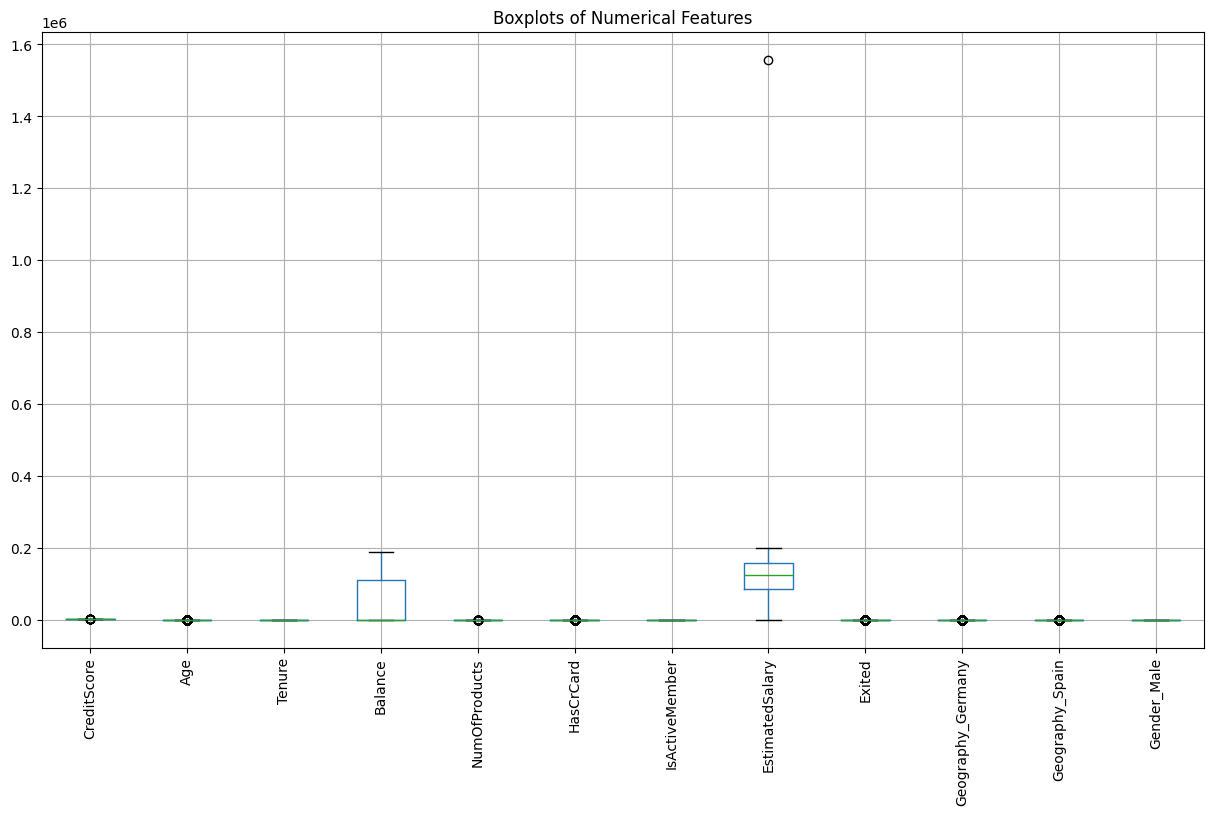

In [22]:
plt.figure(figsize=(15, 8))
df.boxplot(rot=90)
plt.title("Boxplots of Numerical Features")
plt.show()

# Balance the dataset (undersample majority class)

In [23]:
class_0 = df[df.Exited == 0]
class_1 = df[df.Exited == 1]
df_balanced = pd.concat([class_1, class_0.sample(len(class_1), random_state=42)])

# Split

In [24]:
X = df_balanced.drop("Exited", axis=1)
y = df_balanced["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Check For Missing Values

In [ ]:
print("Missing values in X_train:", np.isnan(X_train).sum())
print("Missing values in X_test:", np.isnan(X_test).sum())

# Check Missing values

In [25]:
X_train.isnull().sum()
X_test.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [26]:
correlation_matrix = X_train.corr()



# Display correlation matrix



In [27]:
print(correlation_matrix)

                   CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore           1.000000 -0.061176  0.016347  0.001521       0.017679   
Age                  -0.061176  1.000000 -0.006908  0.110892      -0.187655   
Tenure                0.016347 -0.006908  1.000000 -0.004850       0.003303   
Balance               0.001521  0.110892 -0.004850  1.000000      -0.266802   
NumOfProducts         0.017679 -0.187655  0.003303 -0.266802       1.000000   
HasCrCard             0.016701 -0.028090  0.016767  0.004565       0.024226   
IsActiveMember        0.023114 -0.114941 -0.006443 -0.049565       0.078752   
EstimatedSalary       0.006267  0.023201  0.014857  0.025011       0.010595   
Geography_Germany    -0.012134  0.152680 -0.009428  0.684610      -0.128363   
Geography_Spain       0.015993 -0.021505 -0.007584 -0.189587       0.034908   
Gender_Male           0.026922 -0.139919  0.016476 -0.025454       0.081718   

                   HasCrCard  IsActiveMember  Estim

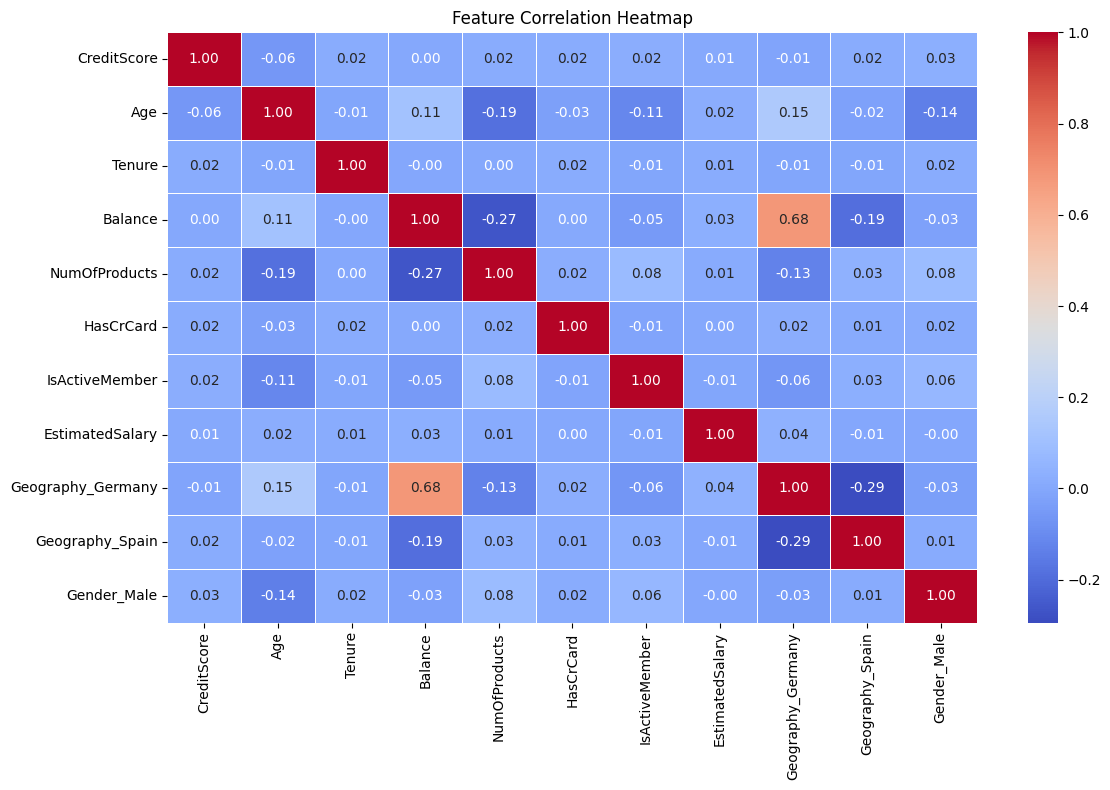

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# Train Random Forest

In [29]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
joblib.dump(model, "model_random_forest.pkl")
print(" Model trained and saved as model_random_forest.pkl")

 Model trained and saved as model_random_forest.pkl


# Predict and evaluate


In [30]:
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", round(f1, 4))

F1 Score: 0.8464


# Confusion Matrix


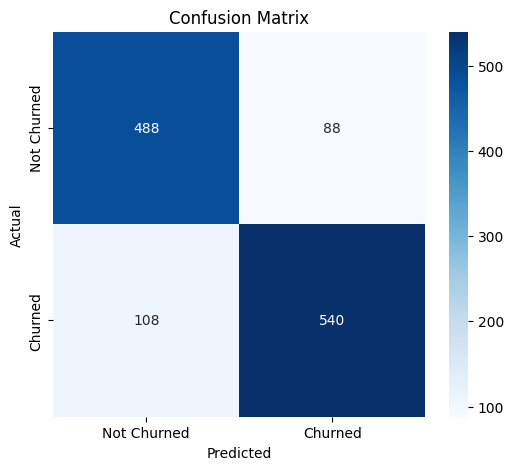

In [31]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churned", "Churned"], yticklabels=["Not Churned", "Churned"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [32]:
test_df = pd.read_csv("../bank-customer-churn-prediction-challenge/test.csv")
test_data = test_df.copy()
for col in [ 'CustomerId', 'Surname']:
    if col in test_data.columns:
        test_data.drop(col, axis=1, inplace=True)
test_data = pd.get_dummies(test_data, columns=['Geography', 'Gender'], drop_first=True)
test_data = test_data.reindex(columns=X_train.columns, fill_value=0)

# Load model and predict


In [33]:
model = joblib.load("model_random_forest.pkl")
probas = model.predict_proba(test_data)[:, 1]


# Create submission file


In [34]:
id_column = test_df.loc[test_data.index, 'id'] if 'id' in test_df.columns else test_df.loc[test_data.index, 'CustomerId']

submission = pd.DataFrame({
    'id': id_column,
    'Exited': probas
})

submission.to_csv("submission_rf.csv", index=False)
print("submission_rf.csv generated")

submission_rf.csv generated
